<a href="https://colab.research.google.com/github/Sharath1207/ANN_Implementation/blob/main/Practical_ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 1.6 MB 54.9 MB/s 
     |████████████████████████████████| 438 kB 66.5 MB/s 
     |████████████████████████████████| 5.8 MB 56.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# importing some libraries
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Exited -> dependent feature
# all other -> independent features

In [12]:
# Divide dataset in to Independent and dependent feature
# I will use few feature from independent feature for analyses

In [13]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
# feature engineering
pd.get_dummies(X['Geography'])


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [17]:
pd.get_dummies(X['Geography'],drop_first = True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [18]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [19]:
## concatenate this  variables with dataframe
X = X.drop(['Geography','Gender'],axis = 1)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [21]:
X = pd.concat([X,geography,gender],axis = 1)

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
X.shape

(10000, 11)

In [24]:
Y.shape

(10000,)

In [26]:
# Splitting the data set in to Training and Testing set
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state=0)

In [28]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [29]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [31]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [32]:
X_train.shape

(8000, 11)

In [33]:
# Creating ANN

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU
from tensorflow.keras.layers import Dropout

In [35]:
# Lets initilaize the ANN
classifier = Sequential()

In [36]:
# Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [37]:
# adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [38]:
# adding second layer
classifier.add(Dense(units=6,activation='relu'))

In [39]:
# adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [40]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
# early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [42]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=200,callbacks = early_stopping)

Epoch 1/200
536/536 [==============================] - 8s 5ms/step - loss: 0.5772 - accuracy: 0.7229 - val_loss: 0.4551 - val_accuracy: 0.8016
Epoch 2/200
536/536 [==============================] - 2s 4ms/step - loss: 0.4257 - accuracy: 0.8160 - val_loss: 0.4266 - val_accuracy: 0.8190
Epoch 3/200
536/536 [==============================] - 2s 4ms/step - loss: 0.3968 - accuracy: 0.8354 - val_loss: 0.4023 - val_accuracy: 0.8300
Epoch 4/200
536/536 [==============================] - 2s 4ms/step - loss: 0.3719 - accuracy: 0.8520 - val_loss: 0.3885 - val_accuracy: 0.8315
Epoch 5/200
536/536 [==============================] - 2s 4ms/step - loss: 0.3592 - accuracy: 0.8550 - val_loss: 0.3782 - val_accuracy: 0.8417
Epoch 6/200
536/536 [==============================] - 2s 4ms/step - loss: 0.3514 - accuracy: 0.8569 - val_loss: 0.3785 - val_accuracy: 0.8444
Epoch 7/200
536/536 [==============================] - 2s 4ms/step - loss: 0.3462 - accuracy: 0.8578 - val_loss: 0.3729 - val_accuracy: 0.8383

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

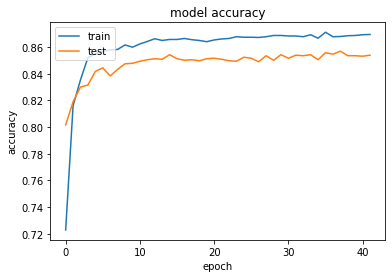

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

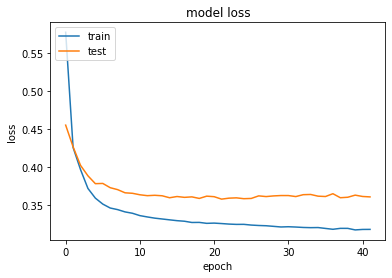

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Making the predection and evaluating model
# predecting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [47]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1508,   87],
       [ 201,  204]])

In [49]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [50]:
score

0.856